In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#Pulling data from file
data = open(r"C:\\Users\\tatem\\python_examples\\eua-dataset\\edge-servers\\site.csv")
my_df = pd.read_csv(data)
my_df

,SITE_ID,LATITUDE,LONGITUDE,NAME,STATE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION,HCIS_L2
0,1000,-12.471947,130.845073,Fort Hill Wharf DARWIN,NT,4,800.0,Unknown,NaN,GO7H
1,10000,-33.756158,150.698182,Cnr Castlereagh & Lethbri PENRITH,NSW,2,2750.0,Unknown,NaN,MV9O
2,10000002,-28.777660,114.634260,Optus 50m Lattice Tower 71 Eastward Road Utakarra,WA,4,NaN,Within 10 meters,NaN,AU3O
3,10000003,-12.464597,130.840708,6 Knuckey Street Darwin,NT,4,NaN,Within 10 meters,NaN,GO7H
4,10000004,-39.596400,143.933900,Cape Wickham Links Clubhouse KING ISLAND,TAS,5,NaN,Within 100 meters,NaN,KX8L
...,...,...,...,...,...,...,...,...,...,...
95557,9989,-33.752425,150.696231,114-116 Henry St Rds PENRITH,NSW,2,2750.0,Within 10 meters,NaN,MV9O
95558,9993,-33.730815,150.697780,5 Andrews Rd PENRITH,NSW,2,2750.0,Unknown,NaN,MV9K
95559,9995,-33.752834,150.698811,CMTS Site 90-92 Henry St PENRITH,NSW,2,2750.0,Within 10 meters,39.0,MV9O
95560,9997,-33.750361,150.696718,Railway Station Belmore St PENRITH,NSW,2,2750.0,Unknown,35.0,MV9O


In [4]:
#Just to make sure column names are correct and make them case sensitive before we start cleaning data
my_df.columns = my_df.columns.str.strip()
print(my_df.head())
print(my_df.columns)

    SITE_ID   LATITUDE   LONGITUDE  \
0      1000 -12.471947  130.845073   
1     10000 -33.756158  150.698182   
2  10000002 -28.777660  114.634260   
3  10000003 -12.464597  130.840708   
4  10000004 -39.596400  143.933900   

                                                NAME STATE  LICENSING_AREA_ID  \
0                             Fort Hill Wharf DARWIN    NT                  4   
1                  Cnr Castlereagh & Lethbri PENRITH   NSW                  2   
2  Optus 50m Lattice Tower 71 Eastward Road Utakarra    WA                  4   
3                            6 Knuckey Street Darwin    NT                  4   
4           Cape Wickham Links Clubhouse KING ISLAND   TAS                  5   

   POSTCODE     SITE_PRECISION  ELEVATION HCIS_L2  
0     800.0            Unknown        NaN    GO7H  
1    2750.0            Unknown        NaN    MV9O  
2       NaN   Within 10 meters        NaN    AU3O  
3       NaN   Within 10 meters        NaN    GO7H  
4       NaN  Within 100 

In [5]:
# Drop rows with 'Unknown' in the 'SITE_PRECISION' column
my_df = my_df[my_df['SITE_PRECISION'] != 'Unknown']

In [6]:
# drop rows with NaN in the 'POSTCODE' column
my_df = my_df.dropna(subset=['POSTCODE'])

In [7]:
my_df

,SITE_ID,LATITUDE,LONGITUDE,NAME,STATE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION,HCIS_L2
95,100001,-38.248652,144.605442,Telstra/Vodafone Site Highfields Queenscliff-P...,VIC,2,3222.0,Within 100 meters,23.0,KX6G
157,10000163,-32.192910,115.971390,NBN Co Site Lot 600 Hopkinson Road HILBERT,WA,3,6122.0,Within 10 meters,NaN,BV4D
160,10000166,-32.173579,115.897624,NBN Co Site 74 Oxley Road Forrestdale,WA,3,6112.0,Within 10 meters,NaN,BV4D
167,10000173,-35.111937,139.034933,"NBN Co NBN Co Site, 1176 Back Callington Rd Ca...",SA,4,5254.0,Within 10 meters,NaN,JW4A
181,10000189,-38.275290,145.136430,NBN Co 1084 Stumpy Gully Road MOOROODUC,VIC,2,3933.0,Within 10 meters,NaN,LX4E
...,...,...,...,...,...,...,...,...,...,...
95551,9973,-34.190774,142.236247,Water Filtration Site BURONGA,NSW,4,2738.0,Within 10 meters,NaN,KW1A
95553,9980,-33.754568,150.716963,Optus Site Corner of Phillip St & Copeland St ...,NSW,2,2747.0,Within 10 meters,48.0,MV9O
95556,9986,-33.764433,150.750859,Cobham Remand Centre Water St WERRINGTON,NSW,2,2747.0,Within 100 meters,NaN,MV9O
95557,9989,-33.752425,150.696231,114-116 Henry St Rds PENRITH,NSW,2,2750.0,Within 10 meters,NaN,MV9O


In [8]:
# Further data cleaning of SITE_PRECISION 
my_df = my_df.dropna(subset=['SITE_PRECISION'])
my_df

,SITE_ID,LATITUDE,LONGITUDE,NAME,STATE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION,HCIS_L2
95,100001,-38.248652,144.605442,Telstra/Vodafone Site Highfields Queenscliff-P...,VIC,2,3222.0,Within 100 meters,23.0,KX6G
157,10000163,-32.192910,115.971390,NBN Co Site Lot 600 Hopkinson Road HILBERT,WA,3,6122.0,Within 10 meters,NaN,BV4D
160,10000166,-32.173579,115.897624,NBN Co Site 74 Oxley Road Forrestdale,WA,3,6112.0,Within 10 meters,NaN,BV4D
167,10000173,-35.111937,139.034933,"NBN Co NBN Co Site, 1176 Back Callington Rd Ca...",SA,4,5254.0,Within 10 meters,NaN,JW4A
181,10000189,-38.275290,145.136430,NBN Co 1084 Stumpy Gully Road MOOROODUC,VIC,2,3933.0,Within 10 meters,NaN,LX4E
...,...,...,...,...,...,...,...,...,...,...
95551,9973,-34.190774,142.236247,Water Filtration Site BURONGA,NSW,4,2738.0,Within 10 meters,NaN,KW1A
95553,9980,-33.754568,150.716963,Optus Site Corner of Phillip St & Copeland St ...,NSW,2,2747.0,Within 10 meters,48.0,MV9O
95556,9986,-33.764433,150.750859,Cobham Remand Centre Water St WERRINGTON,NSW,2,2747.0,Within 100 meters,NaN,MV9O
95557,9989,-33.752425,150.696231,114-116 Henry St Rds PENRITH,NSW,2,2750.0,Within 10 meters,NaN,MV9O


In [9]:
#remove the rows with null values from the ELAVATION 
my_df = my_df.dropna(subset=['ELEVATION'])
my_df

,SITE_ID,LATITUDE,LONGITUDE,NAME,STATE,LICENSING_AREA_ID,POSTCODE,SITE_PRECISION,ELEVATION,HCIS_L2
95,100001,-38.248652,144.605442,Telstra/Vodafone Site Highfields Queenscliff-P...,VIC,2,3222.0,Within 100 meters,23.0,KX6G
192,100002,-37.728550,145.222007,Optus/Vodafone Site Water Tank Blooms Rd NORTH...,VIC,2,3113.0,Within 10 meters,116.0,LX1I
634,10000668,-33.132040,148.181500,Spicer Park Caravan Park off Albert Street PARKES,NSW,4,2870.0,Within 10 meters,362.0,MV7A
666,100007,-41.210755,146.327361,Optus Site KELCEY TIER,TAS,4,7310.0,Within 10 meters,206.0,LY5B
1054,100011,-41.144326,146.078107,Optus Site Off White Hills Road SULLOCKS HILL,TAS,4,7316.0,Within 10 meters,235.0,LY5A
...,...,...,...,...,...,...,...,...,...,...
95548,9970,-35.029117,144.044929,MRE Site 5km North of MOULAMEIN,NSW,4,2733.0,Within 100 meters,75.0,KW6A
95549,9971,-35.099663,143.529008,Council site LAKE POON BOON,NSW,4,3585.0,Within 100 meters,60.0,KW5C
95550,9972,-35.332614,143.612642,Rifle Butts Corner SWAN HILL,NSW,4,3585.0,Within 100 meters,71.0,KW5G
95553,9980,-33.754568,150.716963,Optus Site Corner of Phillip St & Copeland St ...,NSW,2,2747.0,Within 10 meters,48.0,MV9O


In [10]:
# MAKE STATE VALUES INTO BIBNARY (for machine language)
my_df = pd.get_dummies(my_df,columns=['SITE_PRECISION'])

In [11]:
#checking my new index names
print(my_df.columns)

Index(['SITE_ID', 'LATITUDE', 'LONGITUDE', 'NAME', 'STATE',
       'LICENSING_AREA_ID', 'POSTCODE', 'ELEVATION', 'HCIS_L2',
       'SITE_PRECISION_Within 10 meters', 'SITE_PRECISION_Within 100 meters'],
      dtype='object')


In [12]:
#Data should be split into features(used to train) & target (what we are training) variables
x = my_df[['LATITUDE', 'LONGITUDE', 'LICENSING_AREA_ID', 'POSTCODE']]
y = my_df[['SITE_PRECISION_Within 10 meters', 'SITE_PRECISION_Within 100 meters', 'ELEVATION']]

In [13]:
#TRAIN TEST SPLITTING (Using the SKlearn lib)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Drop rows with NaN 
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]

x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]


#MLP REGRESSOR
MLP = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu',max_iter=1000, random_state=42)
#model training
MLP.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [14]:
#moment of truth ... making the first prediction
x_new = pd.DataFrame({
    'LATITUDE': [-41.134326],
    'LONGITUDE': [146.078205],
    'LICENSING_AREA_ID': [2],
    'POSTCODE': [7316.0]
})

predict = MLP.predict(x_new)

In [15]:
predict

array([[  2.28264252,   8.69899437, -38.74435792]])

In [16]:
#MODEL IS WORK WELL !! ME IS HAPPY...2AM, TIME TO SLEEEP.

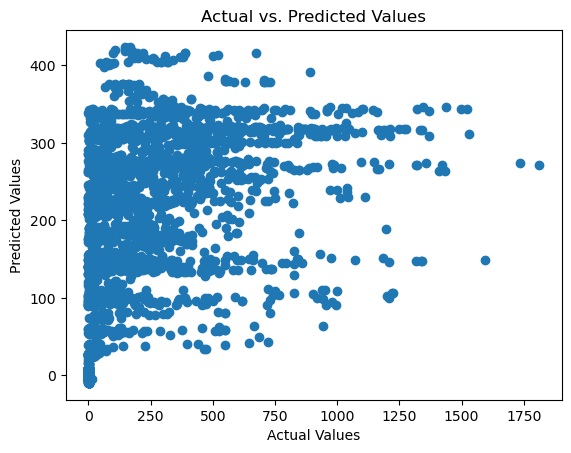

In [17]:
# Wait, Lets visualize the results. Using scatter plot
ya = y_test
yp = MLP.predict(x_test)


plt.scatter(ya, yp)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()